### EDA End to End
* Univariate Analysis
* Bivariate Analysis
    * num vs num
    * cat vs num-boxplot
    * cat vs cat
    
* Missing values
* Outlier Analysis and removal - Boxplot,Normal Distribution.
* **Feature Engineering**
* **Statistical Analysis to verufy the relation between Predictor and Target**
* Data transformation,Scaling & Encoding ~ Data Preprocessing Stage

* **Model Building**
* Data=> input=> Model=>Predicted Value

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sales=pd.read_csv('https://datahack-prod.s3.amazonaws.com/train_file/train_v9rqX0R.csv')

In [3]:
sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
#shape of the data
sales.shape

(8523, 12)

In [5]:
sales.shape[0]

8523

In [6]:
sales.shape[1]

12

In [7]:
#Preview the data
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [8]:
sales.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976
8522,DRG01,14.800,Low Fat,0.044878,Soft Drinks,75.4670,OUT046,1997,Small,Tier 1,Supermarket Type1,765.6700


In [9]:
 sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [10]:
#Numerical variables
nums=sales.select_dtypes(include=np.number).columns

## Univariate

In [11]:
len(nums)

5

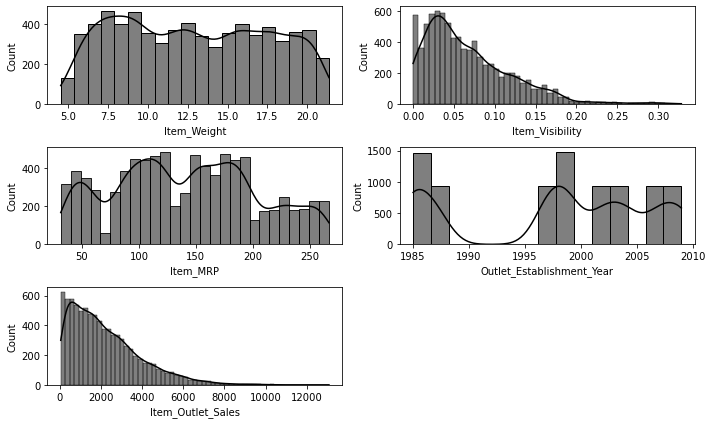

In [12]:
n_rows=3
n_cols=2
counter=1

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[10,6]
for i in nums:
    plt.subplot(n_rows,n_cols,counter)
    sns.histplot(sales.loc[:,i].dropna(),kde=True,color='black')
    counter+=1

plt.tight_layout()
plt.show()

## Inferences

* Item Outlet Sales in positively skewed in nature
* No pattern seen in outlet year
* Item Mrp has multimodel nature


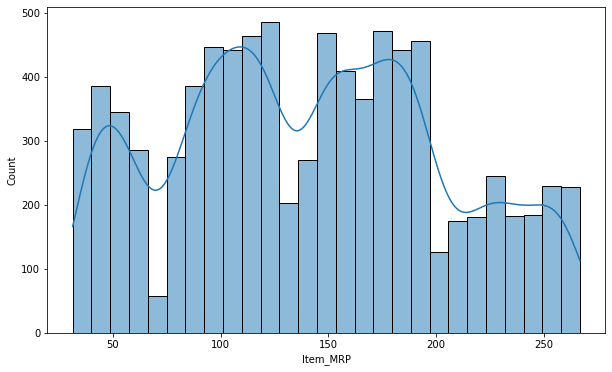

In [13]:
sns.histplot(sales.loc[:,'Item_MRP'],kde=True)
#multi moded data
plt.show()

In [14]:
#Categories
sales.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228


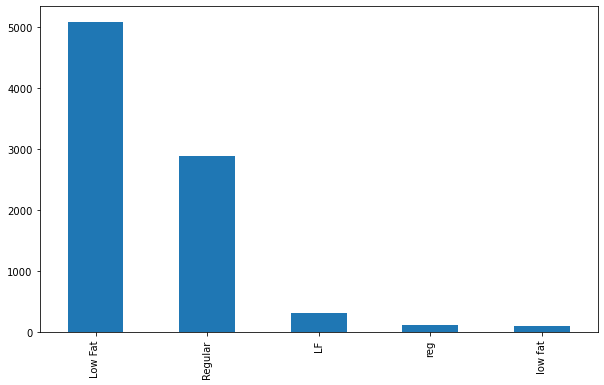

In [15]:
#Item Fat Content
sales.Item_Fat_Content.value_counts().plot.bar()
plt.show()

In [16]:
sales.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [17]:
# replace LF reg and low fat into resp catgories...
sales.Item_Fat_Content.replace(to_replace=['LF','reg','low fat'],value=['Low Fat','Regular','Low Fat'],inplace=True)

In [18]:
sales.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

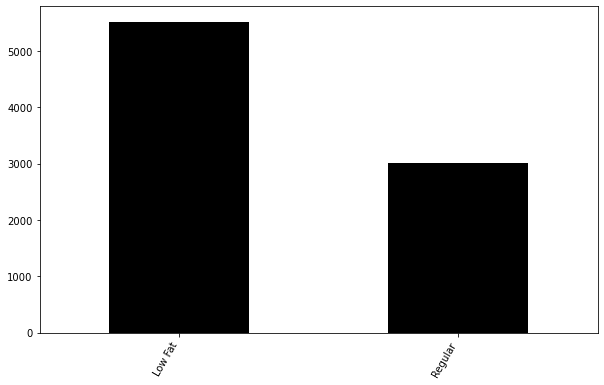

In [19]:
sales.Item_Fat_Content.value_counts().plot.bar(color='black')
plt.xticks(rotation=60,ha='right')
plt.show()

In [20]:
sales

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [21]:
#Item type
sales.Item_Type.value_counts().head(5).index

Index(['Fruits and Vegetables', 'Snack Foods', 'Household', 'Frozen Foods',
       'Dairy'],
      dtype='object')

In [22]:
#Inference:

#top 5 selling items are 
#Fruits and Vegetables',
#'Snack Foods', 
#'Household', 
#'Frozen Foods',
#'Dairy'

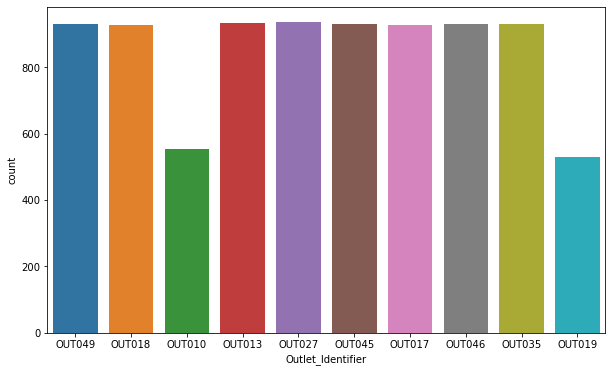

In [23]:
# Outlet_id
sns.countplot(sales.Outlet_Identifier)
plt.show()

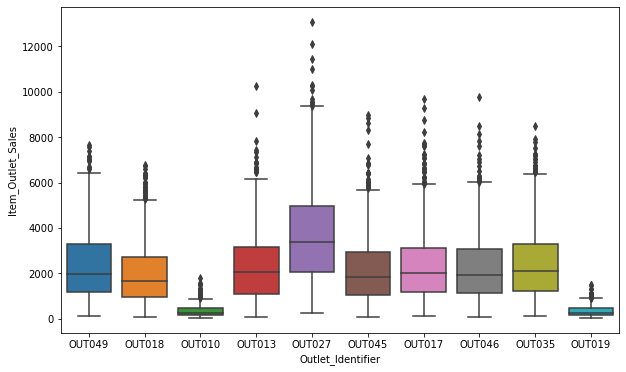

In [24]:
# Hypothesis: Outlet 10 and outlet 19 have lowest sales in comparison to others
sns.boxplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=sales)
plt.show()

In [25]:
#Most Performing outlet is Outlet 27

In [26]:
#outlet size
sales.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [27]:
sales.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [28]:
sales.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

## Summary Univariate Analysis

* out27 is the maximum revenue generator
* We realized that this store is mostly opened in tier03 cities and the type of outlet is medium size outlet
* the items that are sold in the outlet are fruits and vegetables,snacks,frozen, Household followed by dairy
* lowest performing outlets - out10 and out19
* s1 appears to be the most commonly seen outlet across the locations
* 

## Bivariate Analysis

In [29]:
nums=sales.select_dtypes(include=np.number).columns

In [30]:
nums

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

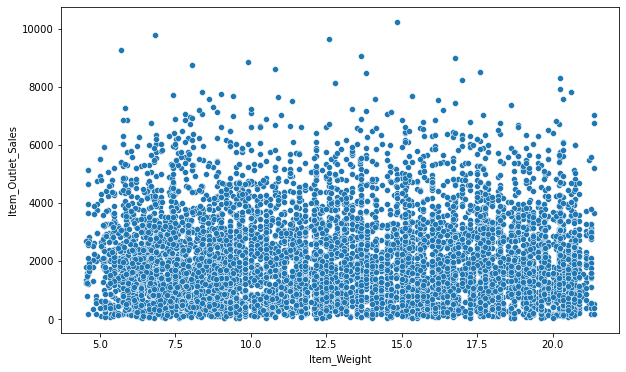

In [31]:
sns.scatterplot(sales.Item_Weight,sales.Item_Outlet_Sales)

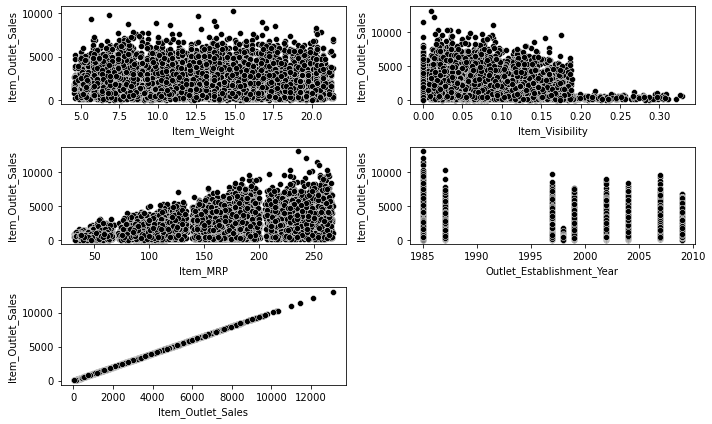

In [32]:
n_rows=3
n_cols=2
counter=1

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=[10,6]
for i in nums:
    plt.subplot(n_rows,n_cols,counter)
    sns.scatterplot(i,'Item_Outlet_Sales',data=sales,color='black')
    counter+=1

plt.tight_layout()
plt.show()

In [33]:
sales.loc[:,['Item_Weight','Item_Outlet_Sales']].corr()

,Item_Weight,Item_Outlet_Sales
Item_Weight,1.000000,0.014123
Item_Outlet_Sales,0.014123,1.000000


In [34]:
sales.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

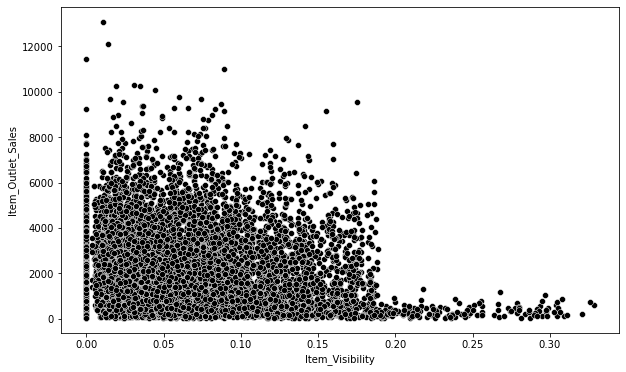

In [35]:
sns.scatterplot('Item_Visibility','Item_Outlet_Sales',data=sales,color='black')

### Inference:

* Visibility vs Sales shows that as visibilty increases, sales decreases
* Item mrp vs sales shows four clusters and co-relation is also good

In [36]:
sales.loc[:,nums].corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


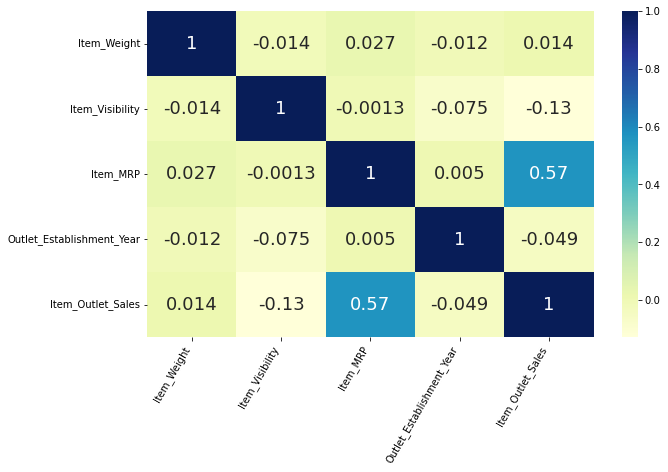

In [37]:
sns.heatmap(sales.loc[:,nums].corr(),annot=True,annot_kws={'size':18},cmap='YlGnBu')
plt.xticks(rotation=60,ha='right')
plt.show()

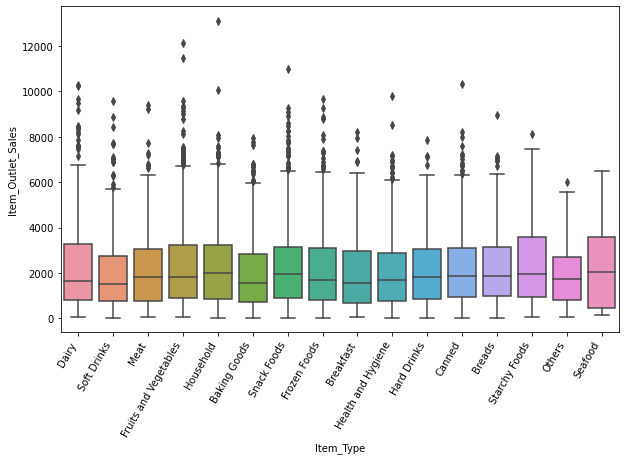

In [38]:
#Cat vs num

#Item_Type vs Sales
sns.boxplot(x='Item_Type',y='Item_Outlet_Sales',data=sales)
plt.xticks(rotation=60,ha='right')
plt.show()

In [39]:
sales.loc[sales.Item_Type=='Seafood','Item_Outlet_Sales'].describe()

count      64.000000
mean     2326.065928
std      1842.988719
min       149.805000
25%       473.383800
50%      2055.324600
75%      3589.327800
max      6503.534400
Name: Item_Outlet_Sales, dtype: float64

In [40]:
nums

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

In [41]:
sales.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

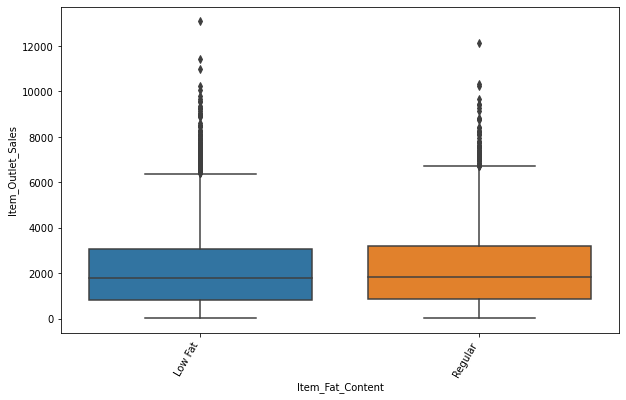

In [42]:
sns.boxplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=sales)
plt.xticks(rotation=60,ha='right')
plt.show()

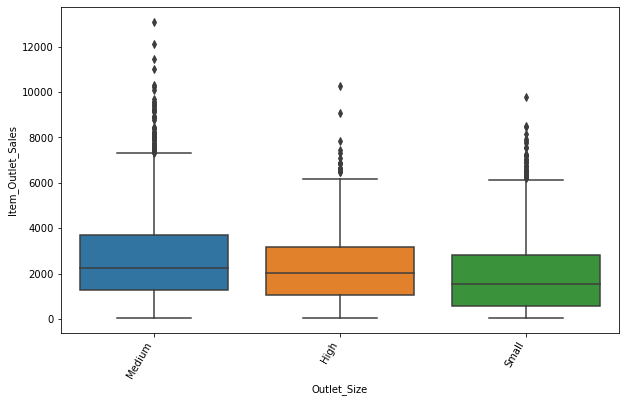

In [43]:
sns.boxplot(x='Outlet_Size',y='Item_Outlet_Sales',data=sales)
plt.xticks(rotation=60,ha='right')
plt.show()

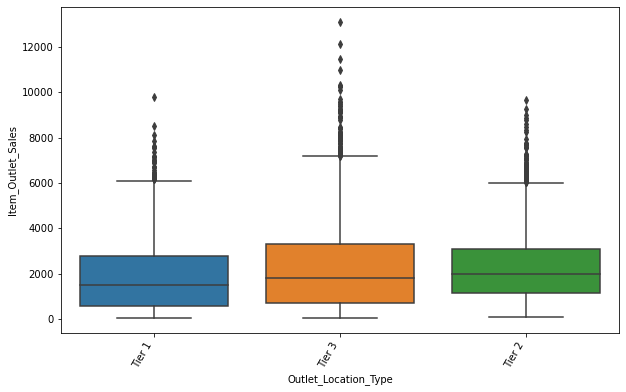

In [44]:
sns.boxplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=sales)
plt.xticks(rotation=60,ha='right')
plt.show()

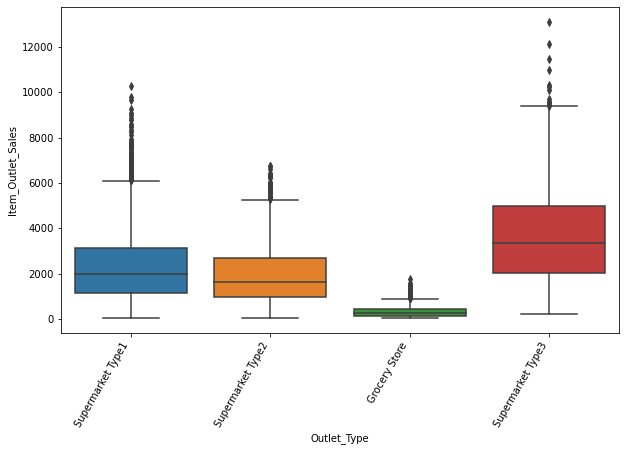

In [45]:
sns.boxplot(x='Outlet_Type',y='Item_Outlet_Sales',data=sales)
plt.xticks(rotation=60,ha='right')
plt.show()

## Bivariate Summary for cat vs num

* Fruits and vegetable, and Household items have the highest outlet sales
* Low Fat items have a slightly higher outlet Sales than Regular item sales
* Medium Scale outlets generate more revenue
* tier 3 cities have a considerably higher sales than other tiers
* Supermarket type3 have the highest outlet sales while Grocery stores have the lowest
* Most performing outlet is outlet 27

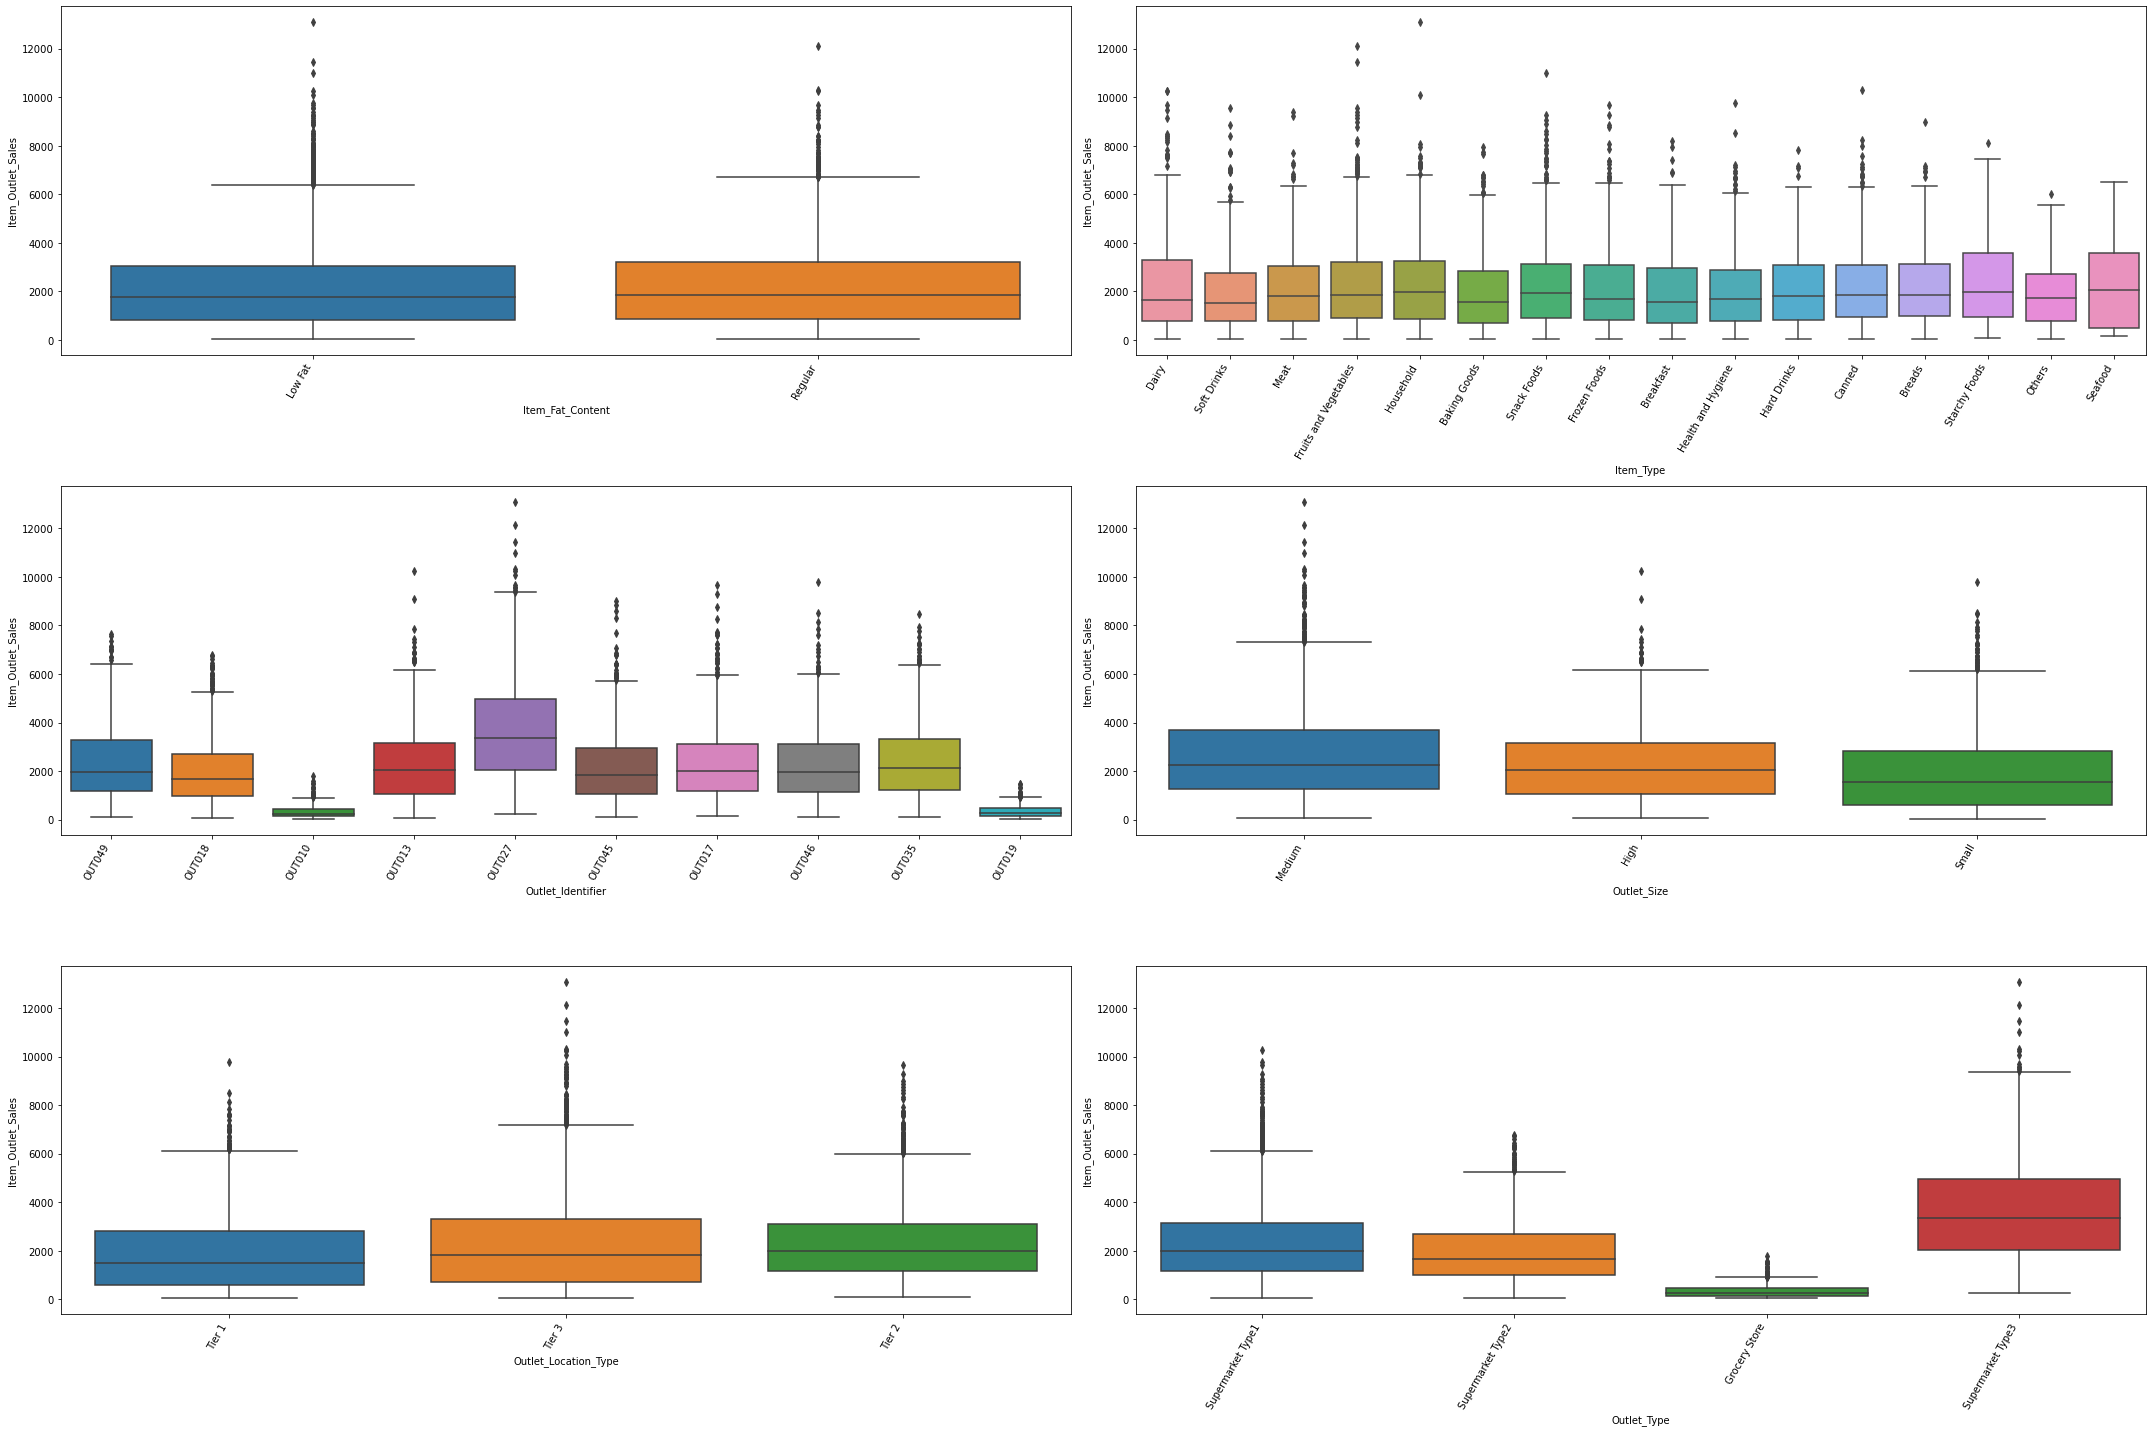

In [47]:
cat=sales.select_dtypes(exclude=np.number).drop(columns='Item_Identifier').columns
rows=3
cols=2
counter=1
plt.rcParams['figure.figsize']=[30,20]
for i in cat:
    plt.subplot(rows,cols,counter)
    sns.boxplot(x=i,y='Item_Outlet_Sales',data=sales)
    plt.xticks(rotation=60,ha='right')
    counter+=1
plt.tight_layout()
plt.show()

In [48]:
cat=sales.select_dtypes(include='object').drop(columns='Item_Identifier').columns

In [49]:
cat

Index(['Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size',
       'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

### Statistics

* Mean
* Median
* Mode
* Quantiles
* Skewness
* Kurotsis
* co variance and co relation


In [50]:
sales.Item_Outlet_Sales.quantile(0.25)

834.2474

In [51]:
sales.Item_Outlet_Sales.quantile(0.50)

1794.331

In [52]:
sales.Item_Outlet_Sales.quantile(0.75)

3101.2964

In [53]:
sales.Item_Outlet_Sales.quantile(0.95)

5522.811

### Skewness

* Skewness is the the assymetric shape of the data if the data is not normal
* If the skewness is positive then it means it is right skewed
* if the skewness is either less than -1 or >+1 it is strongly skewed
* if the skewness if between 0.5 to 1 or -0.5 to 0 then moderately...skewed
* Normal Distribution has a skewness of 0 or max 0.5

In [54]:
sales.skew()

Item_Weight                  0.082426
Item_Visibility              1.167091
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

### Kurtosis

* examples of Leptokurtic curve: Student's t-distribution, logistic distribution, poisson distribution
* if kurt<3: Platykurtic
* if kurt>3: leptokurtic
* if kurt=3: mesokurtic

In [55]:
sales.kurt()

Item_Weight                 -1.227766
Item_Visibility              1.679445
Item_MRP                    -0.889769
Outlet_Establishment_Year   -1.205694
Item_Outlet_Sales            1.615877
dtype: float64

In [56]:
mrp_mean=sales.Item_MRP.mean()
mrp_sd=sales.Item_MRP.std()

In [57]:
num=(sales.Item_MRP-mrp_mean)

In [58]:
zscore=num/mrp_sd

In [59]:
zscore.mean()

-1.5242738173124173e-15

In [60]:
zscore.std()

1.0000000000000004

In [61]:
np.std(zscore)

0.9999413334897275

In [62]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Feature Engineering

In [63]:
lst=[]
for x in sales.Item_Identifier:
    lst.append(x[:2])

sales['Item_ID_Cat']=lst

In [64]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID_Cat
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC


In [65]:
pd.crosstab(sales.Item_ID_Cat,sales.Item_Fat_Content)

Item_Fat_Content,Low Fat,Regular
Item_ID_Cat,,
DR,728,71
FD,3190,2935
NC,1599,0


In [66]:
sales.loc[sales['Item_ID_Cat']=='NC','Item_Fat_Content']='Non Edible'

In [67]:
sales[sales['Item_ID_Cat']=='NC']['Item_Fat_Content']

4       Non Edible
16      Non Edible
22      Non Edible
25      Non Edible
31      Non Edible
           ...    
8500    Non Edible
8502    Non Edible
8504    Non Edible
8516    Non Edible
8520    Non Edible
Name: Item_Fat_Content, Length: 1599, dtype: object

In [68]:
sales['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [69]:
perish=['Dairy', 'Meat', 'Fruits and Vegetables', 'Snack Foods', 'Breakfast','Breads', 'Starchy Foods', 'Seafood']

In [70]:
def new_labels(x):
    if x in perish:
        return('Perishables')
    else:
        return('Non-Perishables')

In [71]:
sales['Item_Type_Perish']=sales['Item_Type'].apply(new_labels)

In [72]:
sales.groupby('Outlet_Identifier')['Item_Outlet_Sales'].max().sort_values(ascending=False).index

Index(['OUT027', 'OUT013', 'OUT046', 'OUT017', 'OUT045', 'OUT035', 'OUT049',
       'OUT018', 'OUT010', 'OUT019'],
      dtype='object', name='Outlet_Identifier')

In [73]:
low=['OUT010','OUT019']
high=['OUT027','OUT013']
average=['OUT046', 'OUT017', 'OUT045', 'OUT035', 'OUT049','OUT018']

In [74]:
def high_average(x):
    if x in low:
        return 'low'
    elif x in average:
        return 'average'
    else:
        return 'high'

In [75]:
sales['performing']=sales['Outlet_Identifier'].apply(high_average)

In [76]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID_Cat,Item_Type_Perish,performing
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,average
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non-Perishables,average
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishables,average
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD,Perishables,low
4,NCD19,8.93,Non Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non-Perishables,high


In [77]:
sales['Vintage']=2013-sales.Outlet_Establishment_Year

In [78]:
sales.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID_Cat,Item_Type_Perish,performing,Vintage
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,average,14
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non-Perishables,average,4
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishables,average,14
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,FD,Perishables,low,15
4,NCD19,8.93,Non Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,NC,Non-Perishables,high,26


### Dealing with missing values

In [79]:
sales.loc[sales['Item_Identifier']=='FDA15','Item_Weight']=9.3# not working

In [80]:
sales.loc[sales['Item_Identifier']=='FDA15','Item_Weight']#not working

0       9.3
831     9.3
2599    9.3
2643    9.3
4874    9.3
5413    9.3
6696    9.3
7543    9.3
Name: Item_Weight, dtype: float64

In [81]:
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                  1462
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_ID_Cat                     0
Item_Type_Perish                0
performing                      0
Vintage                         0
dtype: int64

In [82]:
sales['Item_Weight']=sales.groupby('Item_Identifier')['Item_Weight'].transform(lambda x:x.fillna(x.mean()))

In [83]:
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_ID_Cat                     0
Item_Type_Perish                0
performing                      0
Vintage                         0
dtype: int64

In [84]:
sales[sales['Item_Weight'].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID_Cat,Item_Type_Perish,performing,Vintage
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564,FD,Non-Perishables,high,28
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280,FD,Perishables,high,28
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046,FD,Perishables,high,28
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098,FD,Non-Perishables,low,28


In [85]:
sales.groupby('Item_Type')['Item_Weight'].mean()

Item_Type
Baking Goods             12.285317
Breads                   11.297689
Breakfast                12.779727
Canned                   12.403320
Dairy                    13.379905
Frozen Foods             12.782404
Fruits and Vegetables    13.236713
Hard Drinks              11.456238
Health and Hygiene       13.052327
Household                13.524780
Meat                     12.771212
Others                   13.979438
Seafood                  12.521953
Snack Foods              13.031230
Soft Drinks              11.879775
Starchy Foods            13.841385
Name: Item_Weight, dtype: float64

In [86]:
sales.loc[sales['Item_Identifier']==927,'Item_Weight']=12.782404
sales.loc[sales['Item_Identifier']==1922,'Item_Weight']=13.031230
sales.loc[sales['Item_Identifier']==4187,'Item_Weight']=13.379905
sales.loc[sales['Item_Identifier']==5022,'Item_Weight']=12.285317
# not working

In [87]:
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                     4
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_ID_Cat                     0
Item_Type_Perish                0
performing                      0
Vintage                         0
dtype: int64

In [88]:
sales.loc[sales.Item_Type=='Frozen Foods','Item_Weight'].mean()

12.782403508771965

In [89]:
sales.loc[(sales.Item_Type=='Frozen Foods') & (sales.Item_Weight.isnull()),'Item_Weight']=12.782403508771965

In [90]:
sales.loc[sales.Item_Type=='Snack Foods','Item_Weight'].mean()

13.031230191826587

In [91]:
sales.loc[(sales.Item_Type=='Snack Foods') & (sales.Item_Weight.isnull()),'Item_Weight']=13.031230191826587

In [92]:
sales.loc[sales.Item_Type=='Dairy','Item_Weight'].mean()

13.37990455212926

In [93]:
sales.loc[(sales.Item_Type=='Dairy') & (sales.Item_Weight.isnull()),'Item_Weight']=13.37990455212926

In [94]:
sales.loc[sales.Item_Type=='Baking Goods','Item_Weight'].mean()

12.28531684698612

In [95]:
sales.loc[(sales.Item_Type=='Baking Goods') & (sales.Item_Weight.isnull()),'Item_Weight']=12.28531684698612

In [96]:
sales.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
Item_ID_Cat                     0
Item_Type_Perish                0
performing                      0
Vintage                         0
dtype: int64

In [97]:
sales.groupby('Outlet_Location_Type')['Outlet_Size'].value_counts()

Outlet_Location_Type  Outlet_Size
Tier 1                Small          1458
                      Medium          930
Tier 2                Small           930
Tier 3                Medium         1863
                      High            932
Name: Outlet_Size, dtype: int64

In [98]:
sales.loc[sales['Outlet_Size'].isnull(),['Outlet_Location_Type','Outlet_Type']]

,Outlet_Location_Type,Outlet_Type
3,Tier 3,Grocery Store
8,Tier 2,Supermarket Type1
9,Tier 2,Supermarket Type1
25,Tier 2,Supermarket Type1
28,Tier 3,Grocery Store
...,...,...
8502,Tier 2,Supermarket Type1
8508,Tier 2,Supermarket Type1
8509,Tier 3,Grocery Store
8514,Tier 2,Supermarket Type1


In [99]:
sales.loc[sales.Outlet_Size.isnull(),'Outlet_Size']='Medium'

In [100]:
sales.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
Item_ID_Cat                  0
Item_Type_Perish             0
performing                   0
Vintage                      0
dtype: int64

### Scaling

In [101]:
sales.head().columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'Item_ID_Cat', 'Item_Type_Perish',
       'performing', 'Vintage'],
      dtype='object')

In [102]:
#Drop the unnecessary variables
finaldata=sales.drop(columns=['Item_Identifier',
       'Item_Type', 'Outlet_Identifier',
       'Outlet_Establishment_Year'])


In [103]:
finaldata.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID_Cat,Item_Type_Perish,performing,Vintage
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,average,14
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non-Perishables,average,4
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishables,average,14
3,19.20,Regular,0.000000,182.0950,Medium,Tier 3,Grocery Store,732.3800,FD,Perishables,low,15
4,8.93,Non Edible,0.000000,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,Non-Perishables,high,26


In [104]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

finaldata['scaled_sales']=sc.fit_transform(pd.DataFrame(finaldata.Item_Outlet_Sales))

In [105]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

finaldata['scaled_mrp']=sc.fit_transform(pd.DataFrame(finaldata.Item_MRP))

In [106]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

finaldata['scaled_weight']=sc.fit_transform(pd.DataFrame(finaldata.Item_Weight))

In [107]:
finaldata.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID_Cat,Item_Type_Perish,performing,Vintage,scaled_sales,scaled_mrp,scaled_weight
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,average,14,0.910601,1.747454,-0.769777
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non-Perishables,average,4,-1.018440,-1.489023,-1.497482
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishables,average,14,-0.049238,0.010040,0.995659
3,19.20,Regular,0.000000,182.0950,Medium,Tier 3,Grocery Store,732.3800,FD,Perishables,low,15,-0.849103,0.660050,1.361665
4,8.93,Non Edible,0.000000,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,Non-Perishables,high,26,-0.695373,-1.399220,-0.849437


In [108]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

finaldata['scaled_visibility']=sc.fit_transform(pd.DataFrame(finaldata.Item_Visibility))

In [109]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()

finaldata['scaled_vintage']=sc.fit_transform(pd.DataFrame(finaldata.Vintage))

In [110]:
finaldata.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_ID_Cat,Item_Type_Perish,performing,Vintage,scaled_sales,scaled_mrp,scaled_weight,scaled_visibility,scaled_vintage
0,9.30,Low Fat,0.016047,249.8092,Medium,Tier 1,Supermarket Type1,3735.1380,FD,Perishables,average,14,0.910601,1.747454,-0.769777,-0.970732,-0.139541
1,5.92,Regular,0.019278,48.2692,Medium,Tier 3,Supermarket Type2,443.4228,DR,Non-Perishables,average,4,-1.018440,-1.489023,-1.497482,-0.908111,-1.334103
2,17.50,Low Fat,0.016760,141.6180,Medium,Tier 1,Supermarket Type1,2097.2700,FD,Perishables,average,14,-0.049238,0.010040,0.995659,-0.956917,-0.139541
3,19.20,Regular,0.000000,182.0950,Medium,Tier 3,Grocery Store,732.3800,FD,Perishables,low,15,-0.849103,0.660050,1.361665,-1.281758,-0.020085
4,8.93,Non Edible,0.000000,53.8614,High,Tier 3,Supermarket Type1,994.7052,NC,Non-Perishables,high,26,-0.695373,-1.399220,-0.849437,-1.281758,1.293934


In [111]:
newdata=finaldata.drop(columns=['Item_Weight','Item_Visibility','Item_MRP','Item_Outlet_Sales','Vintage'])

In [112]:
newdata.head()

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_ID_Cat,Item_Type_Perish,performing,scaled_sales,scaled_mrp,scaled_weight,scaled_visibility,scaled_vintage
0,Low Fat,Medium,Tier 1,Supermarket Type1,FD,Perishables,average,0.910601,1.747454,-0.769777,-0.970732,-0.139541
1,Regular,Medium,Tier 3,Supermarket Type2,DR,Non-Perishables,average,-1.018440,-1.489023,-1.497482,-0.908111,-1.334103
2,Low Fat,Medium,Tier 1,Supermarket Type1,FD,Perishables,average,-0.049238,0.010040,0.995659,-0.956917,-0.139541
3,Regular,Medium,Tier 3,Grocery Store,FD,Perishables,low,-0.849103,0.660050,1.361665,-1.281758,-0.020085
4,Non Edible,High,Tier 3,Supermarket Type1,NC,Non-Perishables,high,-0.695373,-1.399220,-0.849437,-1.281758,1.293934


In [113]:
newdata['Outlet_Size']=newdata.Outlet_Size.map({'Small':1,'Medium':2,'High':3})

In [114]:
newdata.head()

,Item_Fat_Content,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_ID_Cat,Item_Type_Perish,performing,scaled_sales,scaled_mrp,scaled_weight,scaled_visibility,scaled_vintage
0,Low Fat,2,Tier 1,Supermarket Type1,FD,Perishables,average,0.910601,1.747454,-0.769777,-0.970732,-0.139541
1,Regular,2,Tier 3,Supermarket Type2,DR,Non-Perishables,average,-1.018440,-1.489023,-1.497482,-0.908111,-1.334103
2,Low Fat,2,Tier 1,Supermarket Type1,FD,Perishables,average,-0.049238,0.010040,0.995659,-0.956917,-0.139541
3,Regular,2,Tier 3,Grocery Store,FD,Perishables,low,-0.849103,0.660050,1.361665,-1.281758,-0.020085
4,Non Edible,3,Tier 3,Supermarket Type1,NC,Non-Perishables,high,-0.695373,-1.399220,-0.849437,-1.281758,1.293934


In [115]:
dummydata=pd.get_dummies(newdata,drop_first=True)

In [118]:
dummydata.head()

,Outlet_Size,scaled_sales,scaled_mrp,scaled_weight,scaled_visibility,scaled_vintage,Item_Fat_Content_Non Edible,Item_Fat_Content_Regular,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_ID_Cat_FD,Item_ID_Cat_NC,Item_Type_Perish_Perishables,performing_high,performing_low
0,2,0.910601,1.747454,-0.769777,-0.970732,-0.139541,0,0,0,0,1,0,0,1,0,1,0,0
1,2,-1.018440,-1.489023,-1.497482,-0.908111,-1.334103,0,1,0,1,0,1,0,0,0,0,0,0
2,2,-0.049238,0.010040,0.995659,-0.956917,-0.139541,0,0,0,0,1,0,0,1,0,1,0,0
3,2,-0.849103,0.660050,1.361665,-1.281758,-0.020085,0,1,0,1,0,0,0,1,0,1,0,1
4,3,-0.695373,-1.399220,-0.849437,-1.281758,1.293934,1,0,0,1,1,0,0,0,1,0,1,0


## Train Test Split and we are good to go for modelling now.